# Preprocesamiento y análisis exploratorio

## Analisis exploratorio

Cargue de librerias

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import collections
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt

In [2]:
import os

# Obtén el directorio actual
os.getcwd()

'/content'

In [3]:
df=pd.read_csv('sample_data/data_peliculas.csv')

In [4]:
df.head()

,Titulo,URL,Descripcion
0,The Little Mermaid,/title/tt5971474/,Adventure Family Fantasy A young m...
1,Fast X,/title/tt5433140/,Action Adventure Crime Dom Toretto...
2,Guardians of the Galaxy Vol. 3,/title/tt6791350/,Action Adventure Comedy Still reel...
3,Killers of the Flower Moon,/title/tt5537002/,Crime Drama History Members of the...
4,John Wick: Chapter 4,/title/tt10366206/,Action Crime Thriller John Wick un...


Limpieza de datos

In [5]:
def pre_procesado_2ejec(texto):
    #Funcion para quitar los caracteres especiales
    texto = texto.lower()
    #texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = re.sub(r"[^A-z 0-9 % ]+", " ", texto)
    texto = texto.strip()
    #texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    #texto = " ".join([spanishStemmer.stem(palabra) for palabra in texto.split() ])
    return texto

In [6]:
nltk.download('stopwords')
stopwords_english = stopwords.words('english')
vacias_locales=["a","the"]
stopwords_english.extend(vacias_locales)

def quitar_palabras_vacias(texto):
    # Se quitan las palabras vacias
    global stopwords_english
    texto=texto.lower()
    arreglo=texto.split()
    arreglo_sin_vacias = [arreglo for arreglo in arreglo if arreglo not in stopwords_english]
    texto_return = " ".join(arreglo_sin_vacias)
    return texto_return

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
df['limpieza']=df['Descripcion'].apply(lambda x: quitar_palabras_vacias(x))

In [8]:
df['limpieza'][0]

'adventure family fantasy young mermaid makes deal sea witch trade beautiful voice human legs discover world water impress prince'

## Analisis exploratorio

Consolidacion de textos

In [9]:
texto_completo= " ".join(df['limpieza'])

Analisis de palabras mas utilizadas

In [10]:
arreglo_limpio=texto_completo.split()
words_count = collections.Counter(arreglo_limpio)
dataframe_org=pd.Series(words_count).to_frame('ColumnName')
dataframe_ord=dataframe_org.sort_values(by=['ColumnName'], ascending=False)
dataframe_ord.head(10)

,ColumnName
drama,810
action,659
adventure,562
comedy,537
thriller,354
crime,317
family,222
horror,218
scifi,217
romance,196


Cuales son las raices de las palabras mas utilizadas

In [11]:
spanishStemmer=SnowballStemmer("english")
arreglo2=arreglo_limpio
contar=0
#raises=[]
for filas in arreglo2:
    arreglo2[contar] =spanishStemmer.stem(filas)
    contar+=1
contador_origenes = collections.Counter(arreglo2)
data_frame_origenes=pd.Series(contador_origenes).to_frame('ColumnName')
data_frame_origenes=data_frame_origenes.sort_values(by=['ColumnName'], ascending=False)
data_frame_origenes.head(10)

,ColumnName
drama,810
action,664
adventur,577
comedi,537
thriller,354
crime,320
mysteri,252
famili,237
horror,218
scifi,217


Nube de palabras

In [12]:
def generar_grafico(texto):
    wordcloud = WordCloud(width=1800, height=1400, background_color='white').generate(texto)
    # Muestra el diagrama de nube de palabras
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    return plt

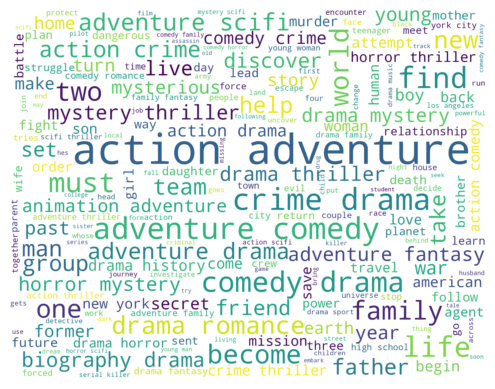

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [13]:
generar_grafico(texto_completo)

Cantidad de palabras sin limpieza

In [14]:
len(arreglo_limpio)

31784

Datos si procesas

In [15]:
texto_completo0= " ".join(df['Descripcion'])
arreglo=texto_completo0.split()
len(arreglo)

51452

In [16]:
data_frame_origenes

,ColumnName
drama,810
action,664
adventur,577
comedi,537
thriller,354
...,...
delta,1
tau,1
chi,1
cruella,1


In [17]:
arreglo_limpio

['adventur',
 'famili',
 'fantasi',
 'young',
 'mermaid',
 'make',
 'deal',
 'sea',
 'witch',
 'trade',
 'beauti',
 'voic',
 'human',
 'leg',
 'discov',
 'world',
 'water',
 'impress',
 'princ',
 'action',
 'adventur',
 'crime',
 'dom',
 'toretto',
 'famili',
 'target',
 'veng',
 'son',
 'drug',
 'kingpin',
 'hernan',
 'rey',
 'action',
 'adventur',
 'comedi',
 'still',
 'reel',
 'loss',
 'gamora',
 'peter',
 'quill',
 'ralli',
 'team',
 'defend',
 'univers',
 'one',
 'mission',
 'could',
 'mean',
 'end',
 'guardian',
 'success',
 'crime',
 'drama',
 'histori',
 'member',
 'osag',
 'tribe',
 'unit',
 'state',
 'murder',
 'mysteri',
 'circumst',
 '1920s',
 'spark',
 'major',
 'fbi',
 'investig',
 'involv',
 'j',
 'edgar',
 'hoover',
 'action',
 'crime',
 'thriller',
 'john',
 'wick',
 'uncov',
 'path',
 'defeat',
 'high',
 'tabl',
 'earn',
 'freedom',
 'wick',
 'must',
 'face',
 'new',
 'enemi',
 'power',
 'allianc',
 'across',
 'globe',
 'forc',
 'turn',
 'old',
 'friend',
 'foe',
 'ac

In [23]:
def origenes(texto):
    spanishStemmer=SnowballStemmer("english")
    arreglo2=texto.split()
    contar=0
    for filas in arreglo2:
        arreglo2[contar] =spanishStemmer.stem(filas)
        contar=contar+1
    texto_completo= " ".join(arreglo2)
    return texto_completo

In [27]:
df['origenes']=df['limpieza'].apply(lambda x: origenes(x))

In [24]:
origenes(df['limpieza'][1])

'action adventur crime dom toretto famili target veng son drug kingpin hernan rey'

In [29]:
df.to_csv('datos_procesados.csv', index=False)